<a href="https://colab.research.google.com/github/GaneshkumarPatel/BANK-MARKETING-EFFECTIVENESS-PREDICTION/blob/main/Final_Team_SSP_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

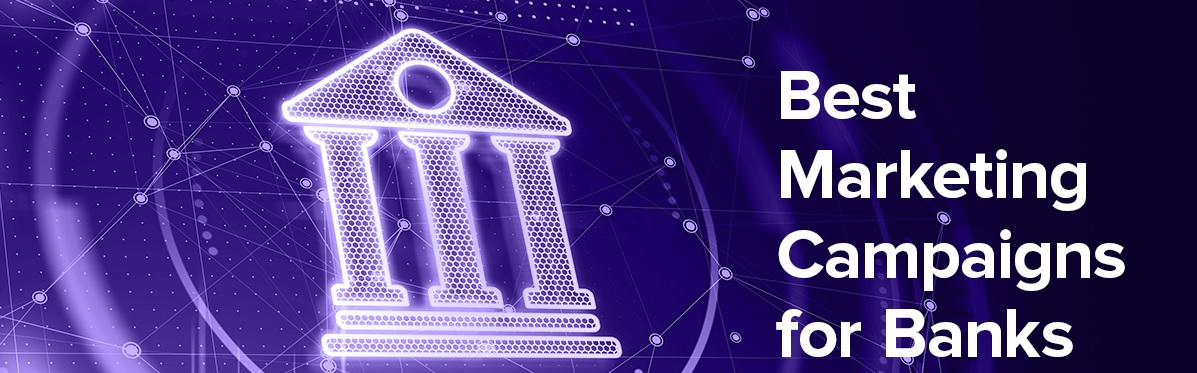

# **Introduction**

### One of the industries that is being transformed the most by the recent Machine learning advances is the finance industry. Be it predicting the stock prices, or in our case predicting, a customer willness to subscribe a term deposit. Therefore, in our project we hve come up with a solution that increases the efficiency by making fewer calls but improves the success rate.

### Here we are given the data of direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (target variable y). For this we went through the following steps to predict the accuracy score of conversion of customer:



*   ### Dataset Overview
*   ### Looking for duplicates and missing values
*   ### Exploratory data analysis
*   ### Feature Engineering
*   ### Balancing the data
*   ### Building models
*   ### Hyperparameter Tuning
*   ### Feature Importance
*   ### Conclusion and Futurescope










###<b>Import libraries

In [ ]:
!pip install klib

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import klib
from numpy import math
from matplotlib import rcParams

import seaborn as sns
import matplotlib.pyplot as plt

###<b>Mount Google Drive

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'   
#file_path='/content/drive/MyDrive/Colab Notebooks/Banking Marketing Eff prediction/Data & Resources/bank-full.csv'
bank_df=pd.read_csv(file_path, sep = ";")

## **Dataset Overview**

In [ ]:
#Checking number of rows and columns in our dataset.
print("Number of rows is: ", bank_df.shape[0])
print("Number of columns is: ", bank_df.shape[1])

Number of rows is:  45211
Number of columns is:  17


In [ ]:
#Name of columns that we have in our data base 
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
#view head of the dataset
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#view tail of the dataset
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## **Looking for Duplicates and Missing Values**

Last thing to check before moving on, is looking for duplicates and missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [ ]:
bank_df.duplicated().sum()

0

In [ ]:
#Checking the total null values in each feature
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From the result we are assured that our data have **no duplicates and missing value** and are good to go. In the case where you did have missing value in your data you can solve it by doing imputation or just remove the column altogether depending on your case.

# **Descriptive Analysis**

Generally, <b>descriptive analyzes</b> are the first manipulations performed in a <b>quantitative</b> study and their main objective is to summarize and explore the behavior of the data involved in the study. Using statistical techniques such as <b>frequency distribution</b>, <b>measures of central tendency</b> and <b>measures of dispersion</b> we can better understand the way in which the phenomena under study behave.

In [ ]:
# Describing data only for numerical features
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In our **numerical columns following points can be inferred**


*   **age**- varies from 18 to 95 with mean and median around 40
*   **balance**- has negative values which ranges upto 102127, which means lot of outliers


*   **duration of call**- ranges upto 4918s with min 0 sec i.e presence of outliers
*   **previous number of contacts**- varies from 0 to 275





In [ ]:
# Describing data only for categorical features
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In our 10 categorical columns



*   **job and month**- has 12 unique categories
*   **education, poutcome**- has 4 unique categories
*   **marital, contact**-  has 3 unique categories

While rest of them has only 2 categories. A some of them has more categories we reduce them and convert them to ordinl features to increse the prediction at less computation cost.



In [ ]:
# data information, It give us non-null values and data type of every column
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#**Exploratary Data Analysis**

Let's do Some Exploratary data analysis of our dataset and read our data closely to perform feature engineering.

<b>Using klib Python library for cleaning, analyzing and preprocessing data.

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


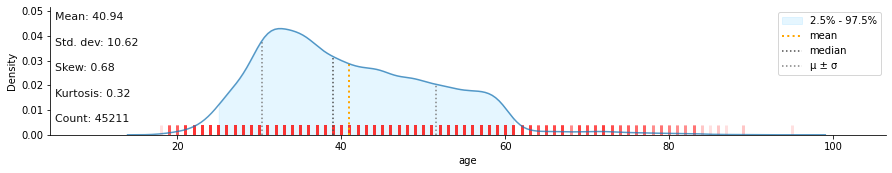

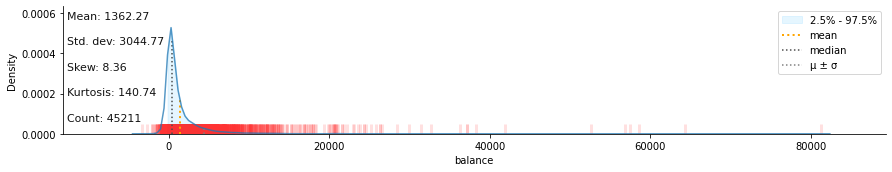

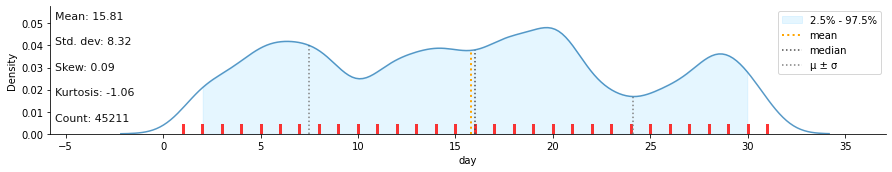

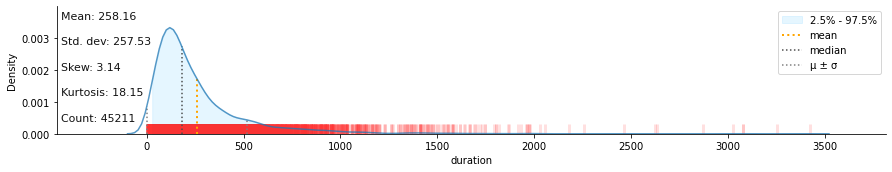

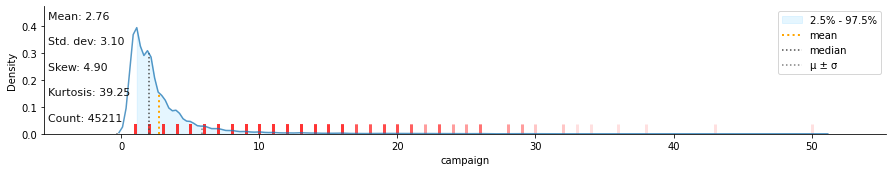

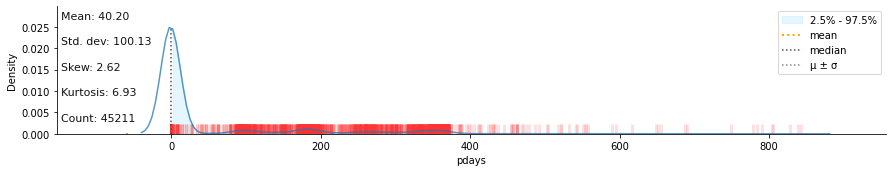

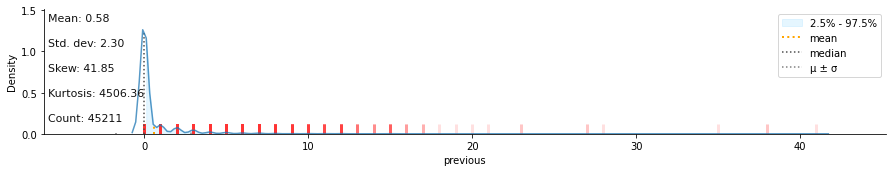

In [ ]:
# default representation of a distribution plot
klib.dist_plot(bank_df)

**Inference**- The above plots are right skewed and except age and day all have outliers which should be removed.

###**Target Class Distribution**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal.

In [ ]:
bank_df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

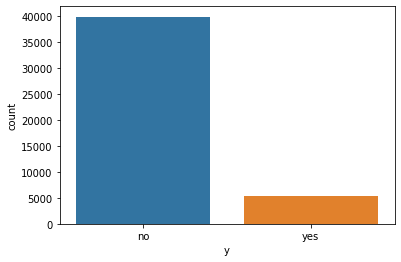

In [ ]:
sns.countplot(bank_df['y'])
plt.show()

**Inference**- Our target class distribution is not balance and has approximate 88:12 distribution.

###**1. Age**

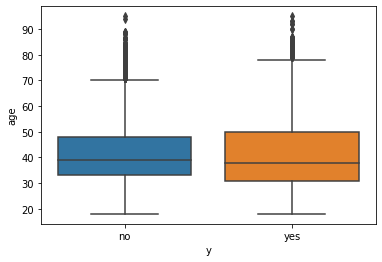

In [ ]:
# Plotting the box plot for outliers
sns.boxplot(y='age',x="y", data= bank_df)
plt.show()

**Inference**- In the above plot it is clear that a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles) and for each of the target variable the age feauture is not linearly seperable.Thus age will be of less importance to us. 

In [ ]:
# Calculating lower limit and upper limit using IQR formula
age_q1 = bank_df['age'].quantile(0.25)
age_q3 = bank_df['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_ll  = age_q1 - 1.5*age_iqr
age_ul  = age_q3 + 1.5*age_iqr
# print(age_q1)
# print(age_q3)
# print(age_iqr)
print(f'Lower limit of age :{age_ll}')
print(f'Upper limit of age :{age_ul}')

Lower limit of age :10.5
Upper limit of age :70.5


###**2. Job**

Type of job: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown.

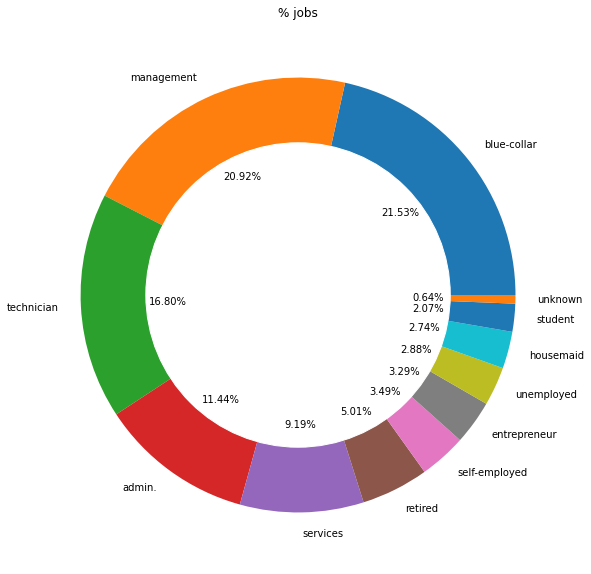

In [ ]:
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(10,10))
plt.pie(bank_df.job.value_counts(),labels=bank_df.job.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% jobs')
plt.show()

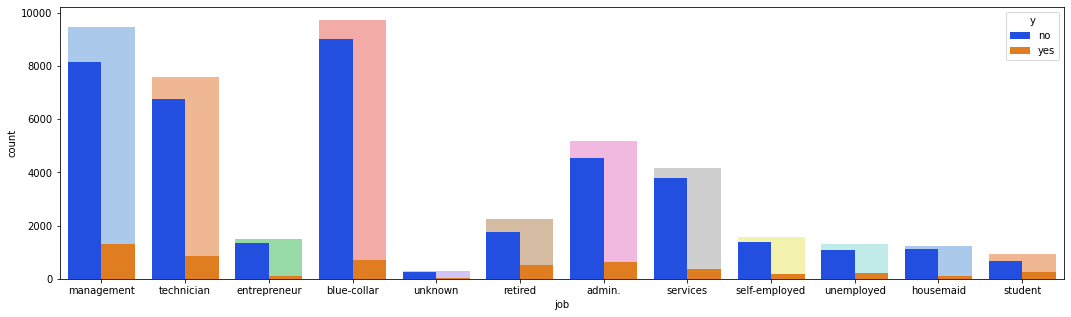

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of job 
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(bank_df.job, ax=ax, palette='pastel')
sns.countplot(bank_df.job, hue=bank_df.y,ax=ax, palette='bright')

**Inference**- Customers with Blue-collar, management and technician showed  maximum interest in subscription. We can also observe the large variance in our data among all categories.

###**3. Marital Status**

Marital status: divorced, married, single, unknown (note: divorced means divorced or widowed)



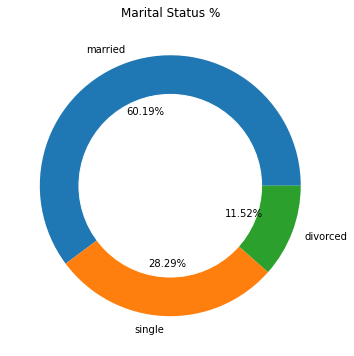

In [ ]:
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.marital.value_counts(),labels=bank_df.marital.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Marital Status %')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for different category of marital status')

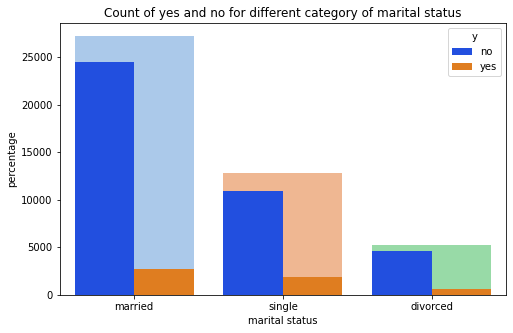

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of marital status
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.marital, ax=ax, palette='pastel')
sns.countplot(bank_df.marital, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('marital status')
plt.ylabel('percentage')
plt.title('Count of yes and no for different category of marital status')

**Inference**- Married and single showed more interest in term deposit

###**4. Education**

Education: Secondary, Primary,Tertiary and Unknown

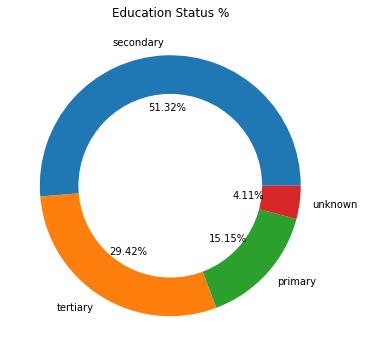

In [ ]:
#Lets see pie plot of job categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.education.value_counts(),labels=bank_df.education.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Education Status %')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for different education level')

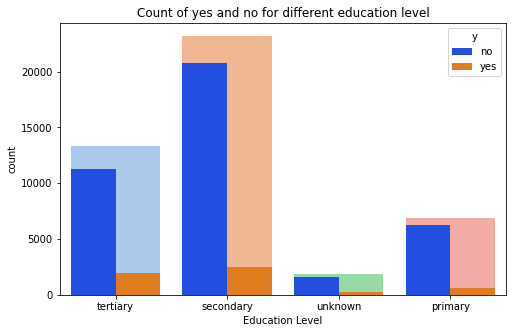

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.education, ax=ax, palette='pastel')
sns.countplot(bank_df.education, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Education Level')
plt.title('Count of yes and no for different education level')

**Inference**- In comparison to primary and some unknown education, people with secondary and tertiary education were more driven towards paying term deposit in bank.

###**5. Default**

Default: has credit in default? (categorical: no, yes, unknown)

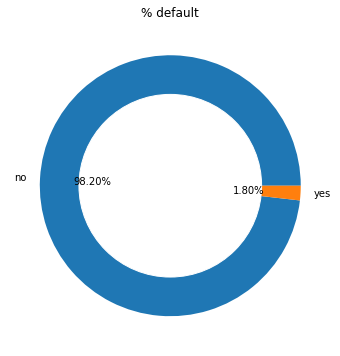

In [ ]:
#Lets see pie plot of default categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.default.value_counts(),labels=bank_df.default.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% default')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for default category')

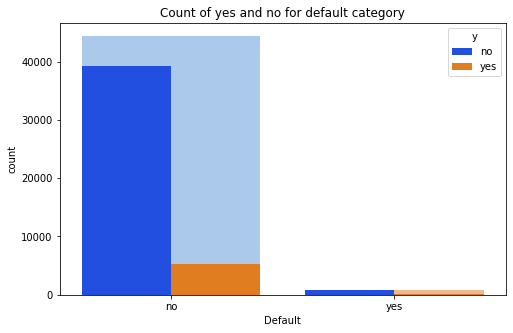

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.default, ax=ax, palette='pastel')
sns.countplot(bank_df.default, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Default')
plt.title('Count of yes and no for default category')

**Inference**- Majority of people don't have credit in default.

**6. Housing Loan**

Housing: has housing loan? (categorical: no, yes, unknown)

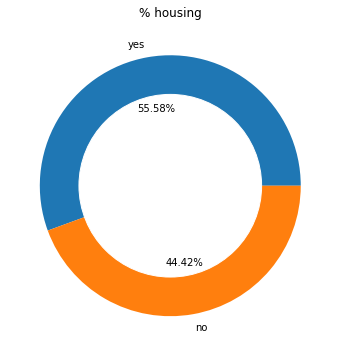

In [ ]:
#Lets see pie plot ofhousing categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.housing.value_counts(),labels=bank_df.housing.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% housing')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for house loan category')

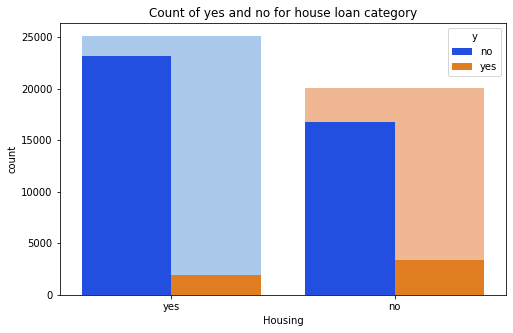

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.housing, ax=ax, palette='pastel')
sns.countplot(bank_df.housing, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Housing')
plt.title('Count of yes and no for house loan category')

**Inference**- Majority of the people had previous housing loans and thus very few of them opted for term deposit.

### **7. Personal Loan**

Loan: has personal loan? (categorical: no, yes, unknown)

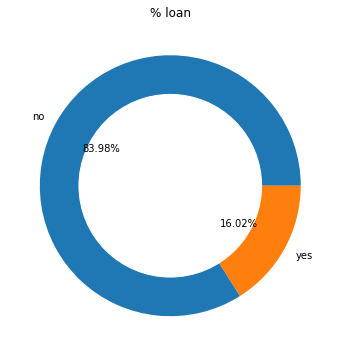

In [ ]:
#Lets see pie plot of loan categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.loan.value_counts(),labels=bank_df.loan.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% loan')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for personal loan category')

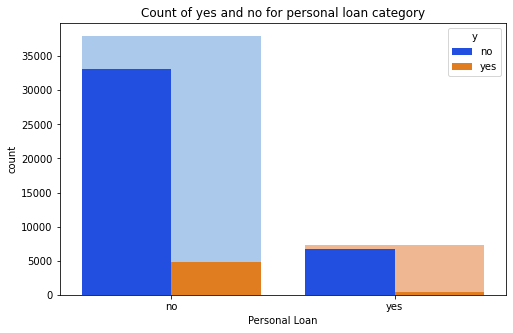

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.loan, ax=ax, palette='pastel')
sns.countplot(bank_df.loan, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Personal Loan')
plt.title('Count of yes and no for personal loan category')

**Inference**- Majority of the people had personal loans and thus very few of them opted for term deposit.

### **8. Contact**

Contact: contact communication type (categorical: cellular, telephone)

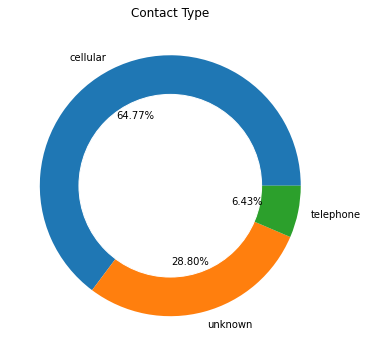

In [ ]:
#Lets see pie plot of contact categorical feature 
plt.figure(figsize=(6,6))
plt.pie(bank_df.contact.value_counts(),labels=bank_df.contact.value_counts().index,autopct='%1.2f%%')

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Contact Type')
plt.show()

Text(0.5, 1.0, 'Count of yes and no for contact category')

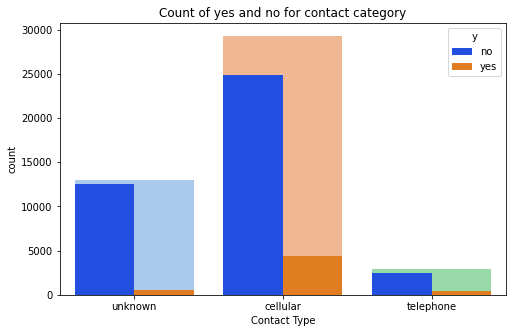

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of different type of educated person
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(bank_df.contact, ax=ax, palette='pastel')
sns.countplot(bank_df.contact, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Contact Type')
plt.title('Count of yes and no for contact category')

**Inference**- Majority of the people were contacted through cellular medium and were converted to the subscription. Thus, cellular medium of contact is more effective in comparison to telephone and other mediums.

###**9. Day**

Date of the month

In [ ]:
#creating a dataset of different days
day = bank_df['day'].value_counts().reset_index()
day = day.rename(columns = {'index':'day', 'day':'day_count'}) # renaming the column
day['day_count%'] = day['day_count']*100/len(bank_df)  # creating new column of different date of each date in every month

#finding out the number of accept term deposit on each day
yes = []
for y in day['day']:
  a = len(bank_df[(bank_df['day'] == y) & (bank_df['y'] == 'yes')])
  yes.append(a)

#finding out the number of not accept term deposit on each day
no = []
for n in day['day']:
  b = len(bank_df[(bank_df['day'] == n) & (bank_df['y'] == 'no')])
  no.append(b)

# converting numbers into % of yes 
day['yes%'] = (yes/day['day_count'])*100

# converting numbers into % of no
day['no%'] = (no/day['day_count'])*100

#Lets see dataset of days
day.head()

,day,day_count,day_count%,yes%,no%
0,20,2752,6.087014,6.976744,93.023256
1,18,2308,5.104952,9.878683,90.121317
2,21,2026,4.481210,9.921027,90.078973
3,17,1939,4.288779,9.076844,90.923156
4,6,1932,4.273296,9.368530,90.631470


In [ ]:
day.tail()

,day,day_count,day_count%,yes%,no%
26,25,840,1.857955,15.833333,84.166667
27,31,643,1.422220,7.153966,92.846034
28,10,524,1.159010,23.091603,76.908397
29,24,447,0.988697,13.870246,86.129754
30,1,322,0.712216,27.950311,72.049689


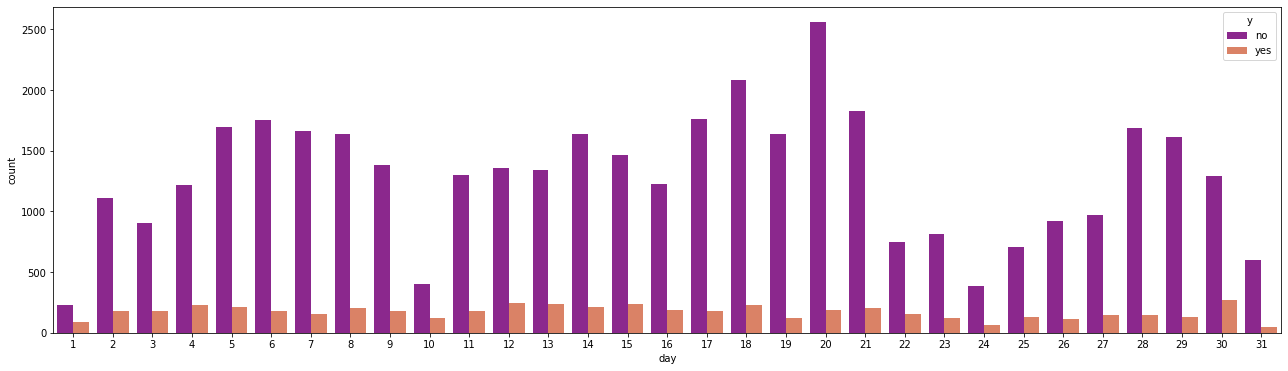

In [ ]:
#Countplot of different day present in our dataset
plt.figure(figsize=(22,6))
sns.countplot(bank_df['day'], hue=bank_df.y,palette="plasma")

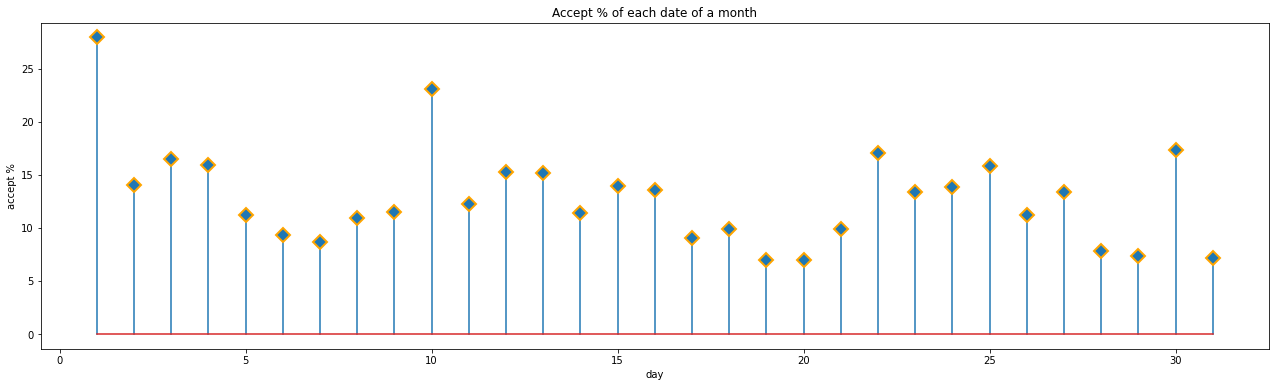

In [ ]:
# create data of days
x= day['day']
value = day['yes%'] 
 
# change color and shape and size and edges
plt.figure(figsize=(22,6))
(markers, stemlines, baseline) = plt.stem(x, value)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.xlabel('day')
plt.ylabel('accept %')
plt.title('Accept % of each date of a month')
plt.show()

**Inference**- From the above plot of accepted term deposit vs day wise graph, we can predict that on first, tenth and near to the end of the month people took the term deposit. This may be due t the fact that various organizations have their on schedules to release salary and then after people opted to pay deposit.

###**10. Month**

Month: last contact month of year (categorical: jan, feb, mar, ..., nov, dec)

Text(0.5, 1.0, 'Count of yes and no for every month')

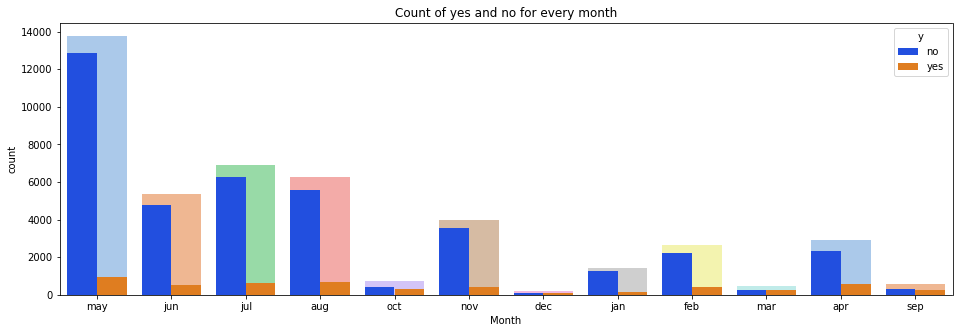

In [ ]:
#Lets explore the count of accept and reject term deposit every month
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(bank_df.month, ax=ax, palette='pastel')
sns.countplot(bank_df.month, hue=bank_df.y,ax=ax, palette='bright')
plt.xlabel('Month')
plt.title('Count of yes and no for every month')

**Inference**- During the month of may there were maximum subscriptions with relatively good subscriptions in june, july and august. During other months we can se less subscription and so we can combine few of them ater on.

###**11. Campaign**

Campaign: **number of contacts performed during this campaign** and for this client (numeric, includes last contact)

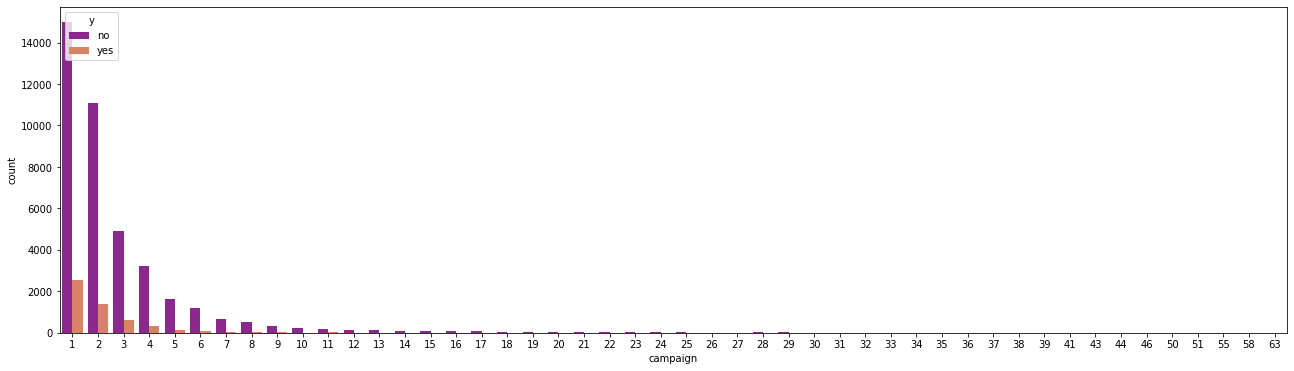

In [ ]:
#Countplot of various number of contact were perfomed to how many people
plt.figure(figsize=(22,6))
sns.countplot(bank_df['campaign'],hue=bank_df.y, palette="plasma")
plt.show()


**Inference**- People were mostly contacted once who subscribed to it, while others were contacted more number of times but the conversion rate reduced after 20 we did not see any significant conversions thus we drop those observations later on.

###**12. Previous**

Previous: number of contacts performed before this campaign and for this client (numeric)

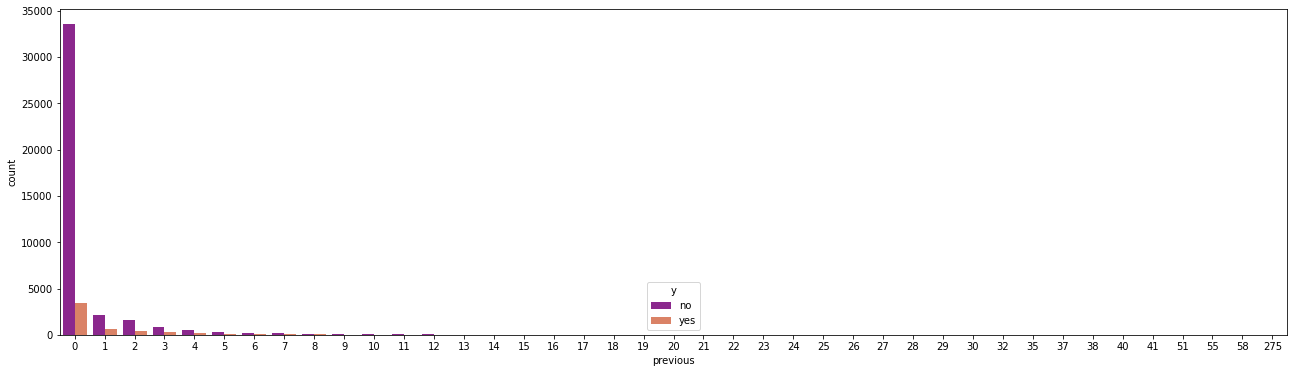

In [ ]:
#Ploting countplot of previous feature
plt.figure(figsize=(22,6))
sns.countplot(bank_df['previous'], hue=bank_df.y, palette="plasma")
plt.show()

**Inference**- We can see above that majority of people were not contacted previously before this campaign and there are no significant contacts after 11 times already done.

###**13. Balance**

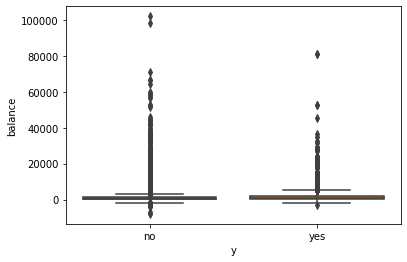

In [ ]:
sns.boxplot(y='balance',x="y", data= bank_df)
plt.show()

**Inference**- Balance of customers is more than 1 lacs and thus we need to remove ouliers as the median is very less near to 450.

###**14. Pdays**

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

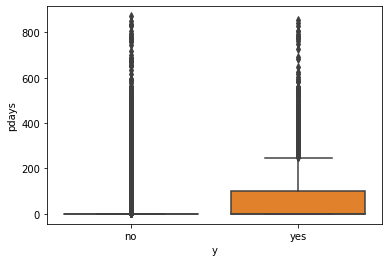

In [ ]:
sns.boxplot(y='pdays',x="y", data= bank_df)

**Inference**- pdays have large outliers andwill have to look upon more closely.

###**15. Poutcome**

poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

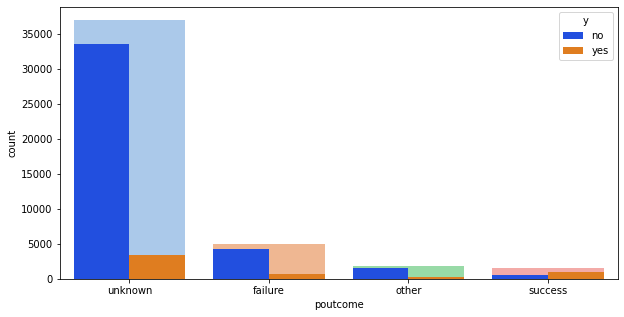

In [ ]:
#Lets explore the count of accept and reject term deposit on the basis of poutcome (result in previous campaign)
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(bank_df.poutcome, ax=ax, palette='pastel')
sns.countplot(bank_df.poutcome, hue=bank_df.y,ax=ax, palette='bright')

**Inference**-

###**16. Duration**

Duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

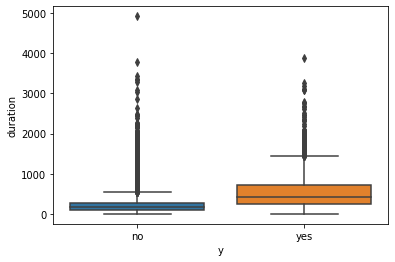

In [ ]:
sns.boxplot(y='duration',x="y", data= bank_df)

**Inference**-

##**Multivariate Scatter Plot**

After performing above univariate analysis we tried to dig deep into the data to see the relation between multiple numerical features with others of same data types. And thus we plotted only three of them, from which we had an idea to get some information.

Text(0.5, 1.0, 'Number of call in current campaign v/s Call Duration')

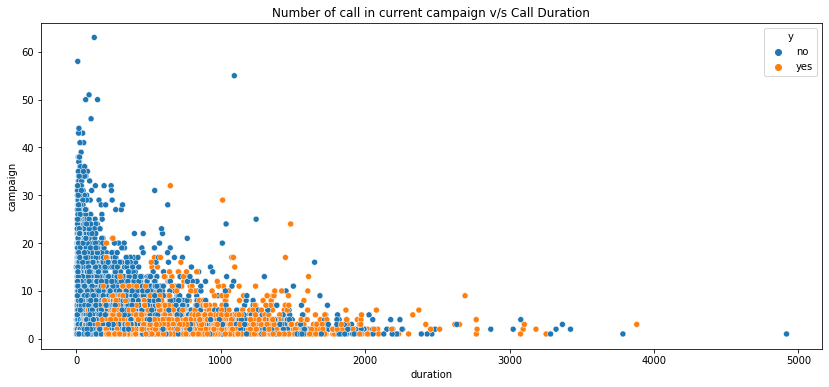

In [ ]:
#Lets try to find some more insights 
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.campaign, hue = bank_df.y)
plt.title('Number of call in current campaign v/s Call Duration')

Text(0.5, 1.0, 'Customer Balance v/s Call Duration')

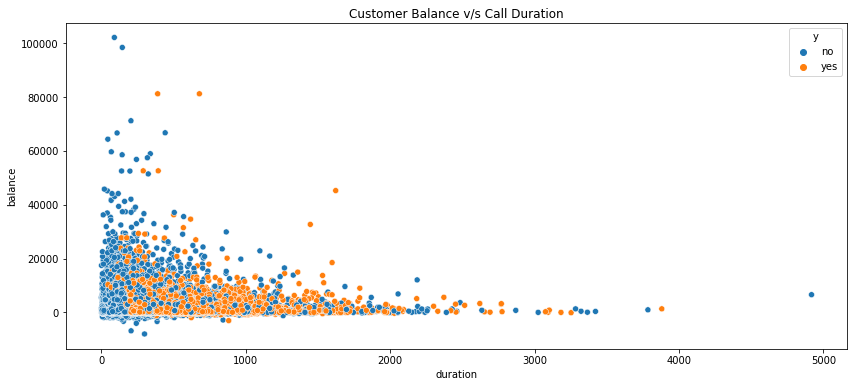

In [ ]:
#Scatter plot visulization
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.duration, y= bank_df.balance, hue = bank_df.y)
plt.title('Customer Balance v/s Call Duration')

Text(0.5, 1.0, 'Customer age v/s Pdays')

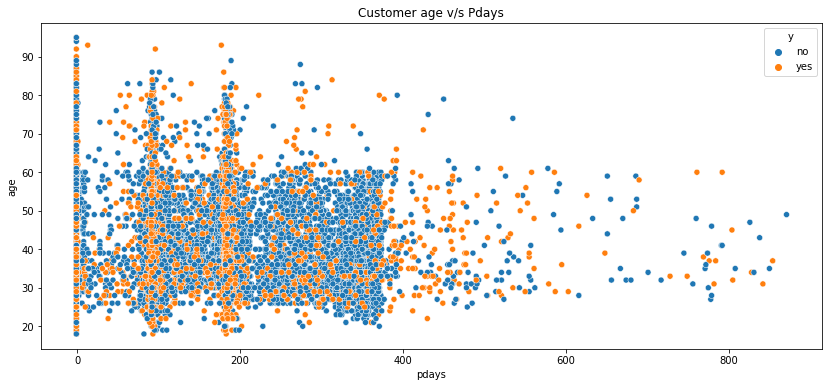

In [ ]:
#representing the term deposit variation
plt.figure(figsize=(14,6))
sns.scatterplot(x= bank_df.pdays, y= bank_df.age, hue = bank_df.y)
plt.title('Customer age v/s Pdays')

**Inference**- 

##**Strip Plot among Numerical and Categorical feature**

In [ ]:
numerical = ['age',	'balance',	'duration','campaign',	'pdays',	'previous']
categorical = ['job','marital','education','default','housing',	'loan',	'contact',	'month',	'poutcome']

#Total numbers of plots = 5x9 = 45

In [ ]:
plt.figure(figsize=(14,6))
for num in numerical:
  for cat in categorical:
    plt.figure(figsize=(14,6))
    sns.stripplot(x= cat, y=num, hue="y", data=bank_df)
    plt.show()

#**Feature Engineering**

In [ ]:
nbdf = bank_df.copy()

In [ ]:
nbdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###**Outliers**

In [ ]:
#Removing outlires from call duration
nbdf = nbdf[~((nbdf['duration']>2000) & (nbdf['y'] == 'no'))]

#Removing outlires from campaign
nbdf = nbdf[~(nbdf['campaign']>20)]

#Removing outlires from previous
nbdf = nbdf[~(nbdf['previous']>11)]

In [ ]:
nbdf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44709.000000,44709.000000,44709.000000,44709.000000,44709.000000,44709.00000,44709.000000
mean,40.947505,1362.302221,15.775414,257.698226,2.627704,39.47080,0.489767
std,10.618520,3044.317494,8.305137,250.110323,2.464511,99.30895,1.370099
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.00000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.00000,0.000000
50%,39.000000,450.000000,16.000000,181.000000,2.000000,-1.00000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.00000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,20.000000,871.00000,11.000000


###**Converting some discrete variable into categorical variable**

***DAY***

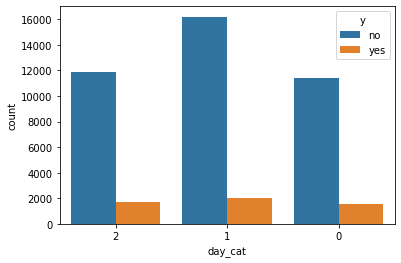

In [ ]:
#DAY
# We dividing day (discrete variable) feature in three parts and convert into categorical feature 
# Creating a function
def replace_day_value(day):
  '''this function is used to  limit the value within the range'''
  if day < 11: #below 11 set value 2
    day = '2'
  elif day < 21:  #more that 10 and below 21 set value 1
    day = '1'
  else:
    day = '0' # others set 0
  return day

#DAY
# function call for the day store it into new column day_cat
nbdf['day_cat'] = nbdf['day'].apply(replace_day_value)

#checking the result plotting barplot
sns.countplot(nbdf['day_cat'], hue = nbdf.y)
plt.show()

***Balance*** 

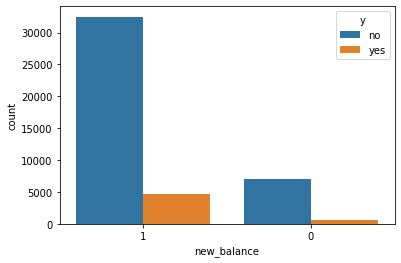

In [ ]:
#Balance
# We dividing balance (continous variable) feature in two parts and convert into categorical feature 
# Creating a function
def replace_balance_value(balance):
  '''this function is used to  limit the value within the range'''
  if balance < 1:  #below 1 set value 0
    balance = '0'
  elif balance < 15000:   #more that 0 and below 15000 set value 1
    balance = '1'
  else:
    balance = '0'   # others set 0
  return balance

# function call for the balance and store it into new column new_balance
nbdf['new_balance'] = nbdf['balance'].apply(replace_balance_value)

#checking the result plotting barplot
sns.countplot(nbdf['new_balance'], hue = nbdf.y)
plt.show()

***PDAYS*** 


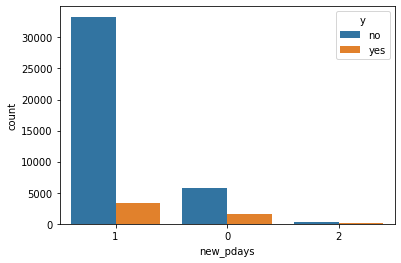

In [ ]:
#PDAYS
# We dividing pdays feature in three parts and convert into categorical feature 
# Creating a function
def replace_pdays_value(pdays):
  '''this function is used to  limit the value within the range'''
  if ((pdays > 97) & (pdays < 103)):      #more that 97 and below 103 set value 2
    pdays = '2'
  elif ((pdays > 196) & (pdays < 204)):      #more that 196 and below 204 set value 2
    pdays = '2'
  elif pdays > 400:   #more than 400 set value 2
    pdays = '2'
  elif pdays <0:   #below 0 set value 1
    pdays = '1'
  else:
    pdays = '0'   # others set 0
  return pdays

# call function for the pdays and store it into new column new_pdays
nbdf['new_pdays'] = nbdf['pdays'].apply(replace_pdays_value)

#checking change plotting barplot
sns.countplot(nbdf['new_pdays'], hue = nbdf.y)
plt.show()

In [ ]:
nbdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day_cat,new_balance,new_pdays
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2,1,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2,1,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2,1,1


##**Reducing JOB categories**

admin+services = adms

enterpenure + selfemployed + unemployed + unknown + housemade = others

retired + student = rstd

In [ ]:
print(nbdf.job.nunique())
nbdf.job.unique()

12


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#Creating dictionary of different job type
job_dict = {'entrepreneur': 'others', 'unknown':'others', 'retired':'rstd', 'admin.':'adms', 'services':'adms',
            'self-employed':'others','unemployed':'others', 'housemaid':'others', 'student':'rstd', 'management':'management',
            'technician':'technician', 'blue-collar':'blue-collar'}

#creating new column new_job after maping
nbdf['new_job'] = nbdf.job.map(job_dict)

print(nbdf.new_job.nunique())
nbdf.new_job.unique()

6


array(['management', 'technician', 'others', 'blue-collar', 'rstd',
       'adms'], dtype=object)

In [ ]:
nbdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,day_cat,new_balance,new_pdays,new_job
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,2,1,1,management
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,2,1,1,technician
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,2,1,1,others
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,2,1,1,blue-collar
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,2,1,1,others


In [ ]:
pd.DataFrame(nbdf.groupby('new_job')['y'].value_counts(normalize= True)).T

new_job      adms           blue-collar           management            \
y              no       yes          no       yes         no       yes   
y        0.892443  0.107557    0.926966  0.073034   0.861696  0.138304   

new_job    others                rstd           technician          
y              no       yes        no       yes         no     yes  
y        0.889231  0.110769  0.754331  0.245669     0.8892  0.1108

In [ ]:
#Creating dictionary of different job type from new_job
job_dict_o = {'adms':2,	'blue-collar':1,	'management':5,	'others':3,	'rstd':6,	'technician':4}

#creating new column new_job_o after maping
nbdf['new_job_o'] = nbdf.new_job.map(job_dict_o)

print(nbdf.new_job_o.nunique())
nbdf.new_job_o.unique()

6


array([5, 4, 3, 1, 6, 2])

In [ ]:
print(nbdf.shape[1])
nbdf.columns

22


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'day_cat', 'new_balance', 'new_pdays',
       'new_job', 'new_job_o'],
      dtype='object')

In [ ]:
#Features selection after removing outlires and creting some new feature (inplace of old feature)
all_feature = ['age',  'marital', 'education', 'default', 'housing','loan', 'contact',  'month', 'campaign',
              'duration',  'poutcome', 'day_cat', 'new_balance', 'new_pdays','new_job_o', 'previous']  #(inplace of old feature) 


#all independent feature with values
all_fet_value = nbdf[all_feature]   

# Get dummies of selected independent feature
all_fet_dumy = pd.get_dummies(all_fet_value,drop_first=True)

In [ ]:
#Feature count and name after one hot encoding
print(all_fet_dumy.shape[1])
all_fet_dumy.columns

34


Index(['age', 'campaign', 'duration', 'new_job_o', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'day_cat_1',
       'day_cat_2', 'new_balance_1', 'new_pdays_1', 'new_pdays_2'],
      dtype='object')

#<b>Correlation Analysis

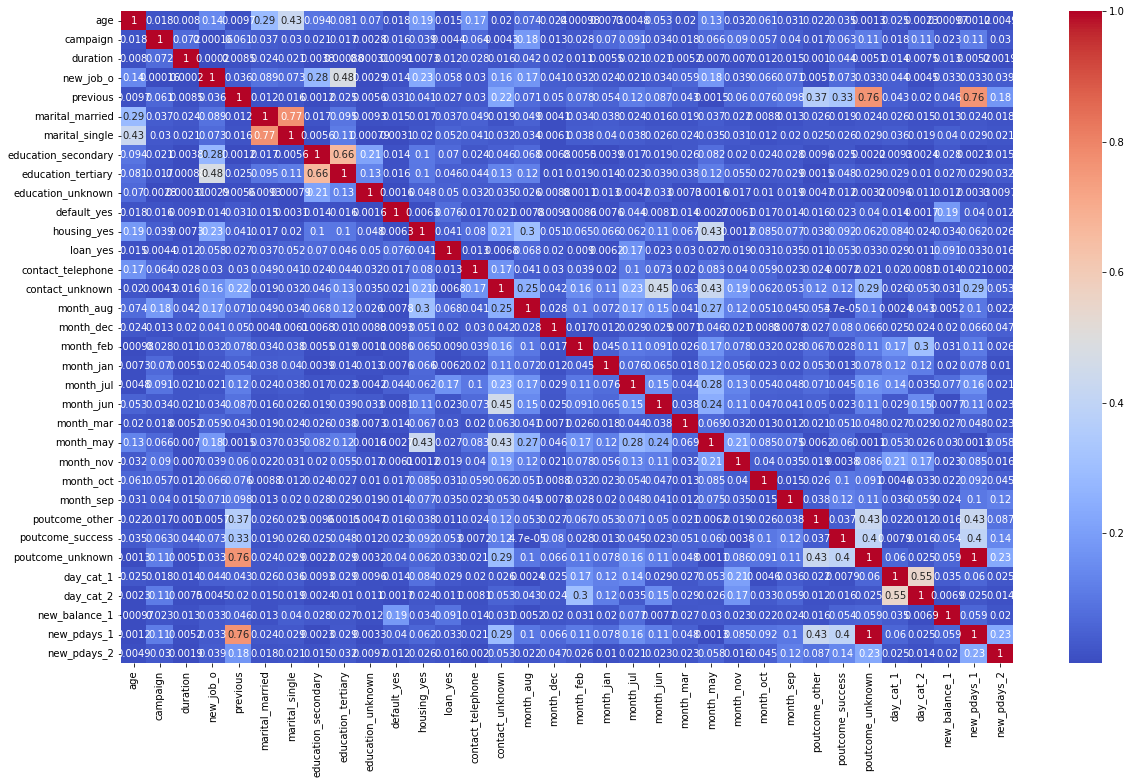

In [ ]:
# Lets see correlation graph after one hot encoding
plt.figure(figsize=(20,12))
correlation = all_fet_dumy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#<b>Prepairing Dataset for Modeling

In [ ]:
all_fet_dumy.columns

Index(['age', 'campaign', 'duration', 'new_job_o', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'day_cat_1',
       'day_cat_2', 'new_balance_1', 'new_pdays_1', 'new_pdays_2'],
      dtype='object')

In [ ]:
# Lets Drop he features which are havinh high colinearioty with each other ( More than 0.6)
independent_variables =  ['age',  'duration', 'new_job_o', 'campaign',
       'marital_single', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'day_cat_2',
       'new_balance_1', 'new_pdays_2']


dependent_variables = 'y'

In [ ]:
# Create the data of independent variables
X = all_fet_dumy[independent_variables]

# Create the dependent variable data
y = pd.get_dummies(nbdf[dependent_variables], drop_first=True)

In [ ]:
#Calculating feature score using chi2 test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
#Checking feature score using chi2 test
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
1,duration,1.810161e+06
24,poutcome_success,4.062566e+03
18,month_mar,7.485953e+02
21,month_oct,7.420795e+02
11,contact_unknown,7.275358e+02
22,month_sep,6.534531e+02
3,campaign,5.793051e+02
2,new_job_o,4.292511e+02
28,new_pdays_2,4.102862e+02
8,housing_yes,3.878639e+02


In [ ]:
#loading required libraries and performing train test split by 70-30 ratio
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

# Splitting the dataset into the Training set and Test set
x_train, x_test_r, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify = y)
print('train features shape:',x_train.shape)
print('test features shape:',x_test_r.shape)
print('train label shape:',y_train.shape)
print('test label shape:',y_test.shape)

train features shape: (31296, 29)
test features shape: (13413, 29)
train label shape: (31296, 1)
test label shape: (13413, 1)


#Handling Imbalance data Using SMOTE

In [ ]:
print("Before OverSampling, counts: Features {} and Label {}".format(x_train.shape,y_train.shape)) 
print("{}".format(y_train.value_counts())) 
print("{}".format(y_test.value_counts())) 
#import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 64) 
x_train_os, y_train_os = sm.fit_resample(x_train, y_train) 
  
print("After OverSampling, counts: Features {} and Label {}".format(x_train_os.shape,y_train_os.shape)) 
print("{}".format(y_train_os.value_counts())) 

Before OverSampling, counts: Features (31296, 29) and Label (31296, 1)
yes
0      27624
1       3672
dtype: int64
yes
0      11839
1       1574
dtype: int64
After OverSampling, counts: Features (55248, 29) and Label (55248, 1)
yes
0      27624
1      27624
dtype: int64


In [ ]:
#performing standard scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#without oversample
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test_r)
#with oversample
x_train_f = scaler.fit_transform(x_train_os)

In [ ]:
# Lets define a function for Evaluation metrics so that we can reuse it again and again
def print_metrics(actual,prediction,model=''):
  print(f'{model} Test accuracy Score', accuracy_score(actual,prediction))
  print(classification_report(actual,prediction))
  
  return confusion_matrix(actual,prediction)

#<b>Models

KNN, Random Forest, LGBM, ANN

#<b>K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_f,y_train_os)
cv_score = cross_val_score(knn,x_train_f,y_train_os,cv=5)

y_pred_knn=knn.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_knn,'KNN')

Cross_validation score [0.74579186 0.94479638 0.94361991 0.94642049 0.95031225]
KNN Test accuracy Score 0.8459703272944159
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     11839
           1       0.40      0.64      0.49      1574

    accuracy                           0.85     13413
   macro avg       0.67      0.76      0.70     13413
weighted avg       0.88      0.85      0.86     13413



array([[10342,  1497],
       [  569,  1005]])

#<b>Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth = 8, n_estimators = 200)
rf_reg.fit(x_train_f,y_train_os)
cv_score = cross_val_score(rf_reg,x_train_f,y_train_os,cv=5)

y_pred_rf=rf_reg.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_rf,'RandomForest')

Cross_validation score [0.80705882 0.92932127 0.92434389 0.92759526 0.92859082]
RandomForest Test accuracy Score 0.8174159397599344
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     11839
           1       0.37      0.80      0.51      1574

    accuracy                           0.82     13413
   macro avg       0.67      0.81      0.70     13413
weighted avg       0.90      0.82      0.84     13413



array([[9710, 2129],
       [ 320, 1254]])

#<b>LGBM

In [ ]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate=0.09, max_depth= 25, n_estimators= 50)

lgbm.fit(x_train_f,y_train_os)
cv_score = cross_val_score(lgbm,x_train_f,y_train_os,cv=5)

y_pred_lgbm = lgbm.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.77900452 0.9438009  0.94280543 0.94289076 0.94162368]
LGBM Test accuracy Score 0.8300156564526951
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     11839
           1       0.39      0.82      0.53      1574

    accuracy                           0.83     13413
   macro avg       0.68      0.82      0.71     13413
weighted avg       0.90      0.83      0.85     13413



array([[9846, 1993],
       [ 287, 1287]])

**************************************************
Train AUC: 0.982
Test AUC: 0.897
**************************************************
Train Accuracy: 0.928
Test Accuracy: 0.830


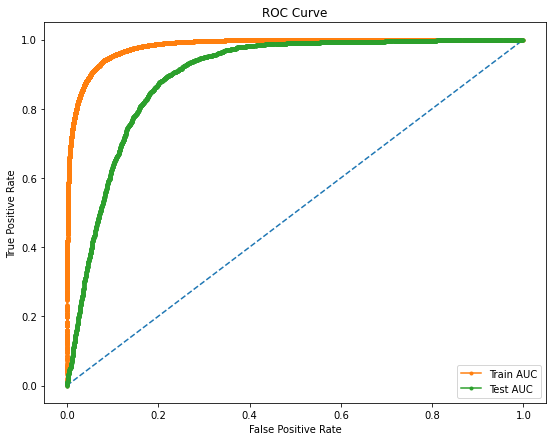

In [ ]:
y_probs_train = lgbm.predict_proba(x_train_f)
y_probs_test = lgbm.predict_proba(x_test)
y_predicted_train = lgbm.predict(x_train_f)
y_predicted_test = lgbm.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train_os, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train_os, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_os, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

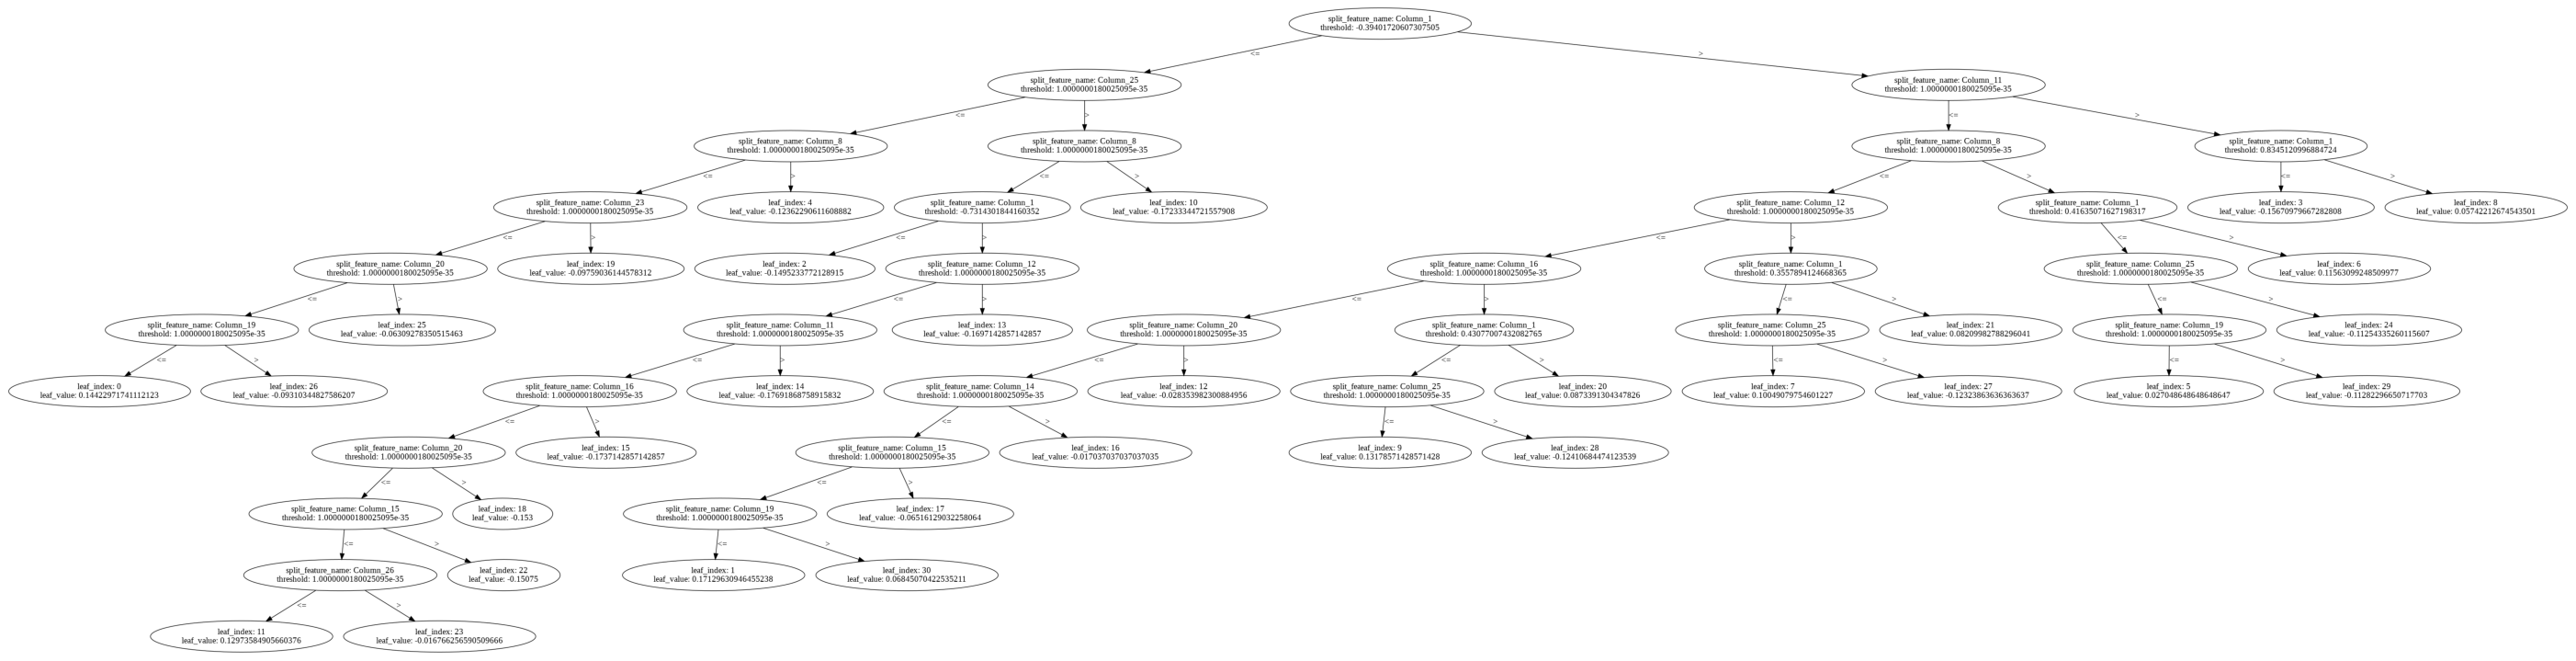

In [ ]:
#LGBM TREE 
import lightgbm
lightgbm.plot_tree(lgbm,figsize=(50,50))
plt.show()

#Feature Importance

<BarContainer object of 29 artists>

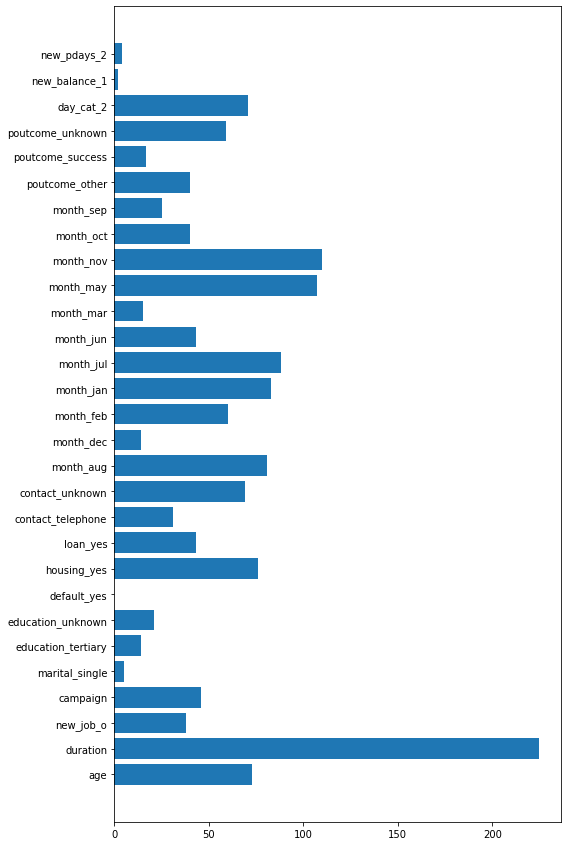

In [ ]:
plt.figure(figsize=(8,15))
plt.barh(X.columns, lgbm.feature_importances_)

#<b>Without Including Duration Feature

In [ ]:
x_train_os_without_duration = x_train_os.drop(['duration'], axis=1)
x_test_os_without_duration = x_test_r.drop(['duration'], axis=1)

In [ ]:
x_train_new = scaler.fit_transform(x_train_os_without_duration)
x_test_new = scaler.transform(x_test_os_without_duration)

In [ ]:
#loading libraries
from lightgbm import LGBMClassifier

lgbm_wt = LGBMClassifier(learning_rate=0.09, max_depth= 25, n_estimators= 50)

lgbm_wt.fit(x_train_new,y_train_os)
cv_score = cross_val_score(lgbm_wt,x_train_new,y_train_os,cv=5)

y_pred_lgbm = lgbm_wt.predict(x_test_new)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM')

Cross_validation score [0.70316742 0.94289593 0.94552036 0.946511   0.94850213]
LGBM Test accuracy Score 0.8744501602922538
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11839
           1       0.45      0.34      0.39      1574

    accuracy                           0.87     13413
   macro avg       0.68      0.64      0.66     13413
weighted avg       0.86      0.87      0.87     13413



array([[11186,   653],
       [ 1031,   543]])

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score

**************************************************
Train AUC: 0.961
Test AUC: 0.762
**************************************************
Train Accuracy: 0.911
Test Accuracy: 0.874


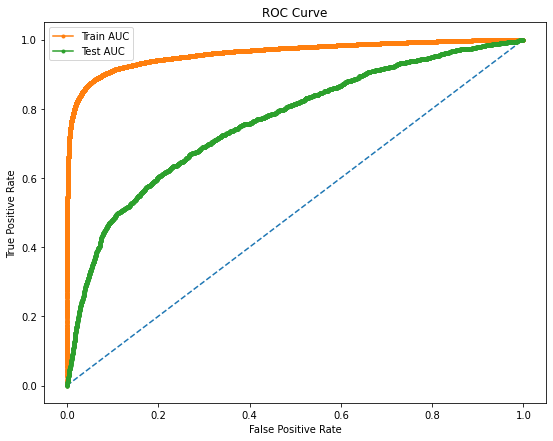

In [ ]:
y_probs_train = lgbm_wt.predict_proba(x_train_new)
y_probs_test = lgbm_wt.predict_proba(x_test_new)
y_predicted_train = lgbm_wt.predict(x_train_new)
y_predicted_test = lgbm_wt.predict(x_test_new)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train_os, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train_os, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

#score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_os, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
#Hyperparameter Tunning of LGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit


parameters=[{'learning_rate': [0.001, 0.05, 0.09, 0.1, 0.3, 0.5], 'max_depth': range(5, 25), 'n_estimators': range(30, 150, 10)}] 

lgbm_grid=RandomizedSearchCV(lgbm,parameters,cv=5,verbose=10)
lgbm_grid.fit(x_train_f,y_train_os)

y_pred_lgbm=lgbm_grid.predict(x_test)

print('Cross_validation score',cv_score)
print_metrics(y_test,y_pred_lgbm,'LGBM_Hypertunning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.5, max_depth=18, n_estimators=50...........
[CV 1/5; 1/10] END learning_rate=0.5, max_depth=18, n_estimators=50;, score=0.750 total time=   0.7s
[CV 2/5; 1/10] START learning_rate=0.5, max_depth=18, n_estimators=50...........
[CV 2/5; 1/10] END learning_rate=0.5, max_depth=18, n_estimators=50;, score=0.949 total time=   0.5s
[CV 3/5; 1/10] START learning_rate=0.5, max_depth=18, n_estimators=50...........
[CV 3/5; 1/10] END learning_rate=0.5, max_depth=18, n_estimators=50;, score=0.952 total time=   0.5s
[CV 4/5; 1/10] START learning_rate=0.5, max_depth=18, n_estimators=50...........
[CV 4/5; 1/10] END learning_rate=0.5, max_depth=18, n_estimators=50;, score=0.953 total time=   0.5s
[CV 5/5; 1/10] START learning_rate=0.5, max_depth=18, n_estimators=50...........
[CV 5/5; 1/10] END learning_rate=0.5, max_depth=18, n_estimators=50;, score=0.948 total time=   0.6s
[CV 1/5; 2/10] START learning

array([[10138,  1701],
       [  407,  1167]])

In [ ]:
lgbm_grid.best_params_

{'learning_rate': 0.3, 'max_depth': 23, 'n_estimators': 140}

#<b>ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# converting output variable into ANN output understandable format
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train_os = keras.utils.to_categorical(y_train_os, num_classes)

In [ ]:
#Initializine the ANN

ann = keras.models.Sequential()

ann.add(layers.Flatten())
#add input_Layer_and_1st_Hidden_Layer
ann.add(keras.layers.Dense(units = 128, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_second_hidden_layer
ann.add(keras.layers.Dense(units = 100, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_third_hidden_layer
ann.add(keras.layers.Dense(units = 75, activation= 'relu'))

# drop out layer will help in reducing the chances of overfitting
ann.add(keras.layers.Dropout(0.2))

#add_fourth_hidden_layer
ann.add(keras.layers.Dense(units = 50 ,activation = 'relu'))

#add_Output_layer
ann.add(keras.layers.Dense(num_classes, activation="softmax"))                      
                           
#compiling the layers we defined earlier
ann.compile(optimizer ='adam' ,loss ='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#train_ANN

ann.fit(x_train_f,y_train_os, batch_size = 100, epochs = 50)

Epoch 1/50
553/553 [==============================] - 3s 3ms/step - loss: 0.2377 - accuracy: 0.9025
Epoch 2/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1976 - accuracy: 0.9170
Epoch 3/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1902 - accuracy: 0.9207
Epoch 4/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1867 - accuracy: 0.9225
Epoch 5/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1841 - accuracy: 0.9232
Epoch 6/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1815 - accuracy: 0.9237
Epoch 7/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1794 - accuracy: 0.9253
Epoch 8/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1796 - accuracy: 0.9255
Epoch 9/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1765 - accuracy: 0.9265
Epoch 10/50
553/553 [==============================] - 2s 3ms/step - loss: 0.1762 - accuracy: 0.9264

In [ ]:
y_pred_tuned_ann=ann.predict(x_test)
y_pred_tuned_ann1=np.where(y_pred_tuned_ann>0.5,1,0)
print_metrics((y_test[:,1]),(y_pred_tuned_ann1[:,1]),'ANN test')

ANN test Test accuracy Score 0.7288451502273914
              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     11839
         1.0       0.29      0.93      0.45      1574

    accuracy                           0.73     13413
   macro avg       0.64      0.82      0.63     13413
weighted avg       0.91      0.73      0.78     13413



array([[8313, 3526],
       [ 111, 1463]])

#<b>Model Comparision

In [ ]:
from prettytable import PrettyTable

In [ ]:
print('**********  Comparison of different models for Class 1(Yes)  ************')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['KNN', 0.8457, 0.4, 0.64, 0.49])
table.add_row(['Random Forest', 0.8174, 0.37, 0.8, 0.51])
table.add_row(['LGBM', 0.83, 0.39, 0.82, 0.53])
table.add_row(['LGBM_without_Duration', 0.8744, 0.45, 0.34, 0.39])
table.add_row(['ANN', 0.7288, 0.29, 0.93, 0.45])

print(table)

**********  Comparison of different models for Class 1(Yes)  ************
+-----------------------+---------------+-----------+--------+----------+
|         Model         | Test Accuracy | Precision | Recall | F1_score |
+-----------------------+---------------+-----------+--------+----------+
|          KNN          |     0.8457    |    0.4    |  0.64  |   0.49   |
|     Random Forest     |     0.8174    |    0.37   |  0.8   |   0.51   |
|          LGBM         |      0.83     |    0.39   |  0.82  |   0.53   |
| LGBM_without_Duration |     0.8744    |    0.45   |  0.34  |   0.39   |
|          ANN          |     0.7288    |    0.29   |  0.93  |   0.45   |
+-----------------------+---------------+-----------+--------+----------+


#**SHAP Features**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 7.6 MB/s 


In [ ]:
# Load ML Interpreting Models
import shap
# Initialize JS For Plot
shap.initjs()


In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(lgbm)

shap_values = explainer.shap_values(x_test)

In [ ]:
class_names=['no','yes']

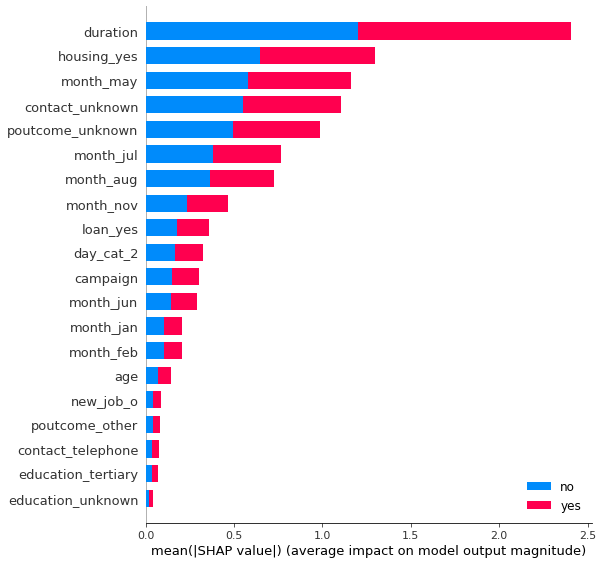

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar", class_names= class_names, feature_names = X.columns)

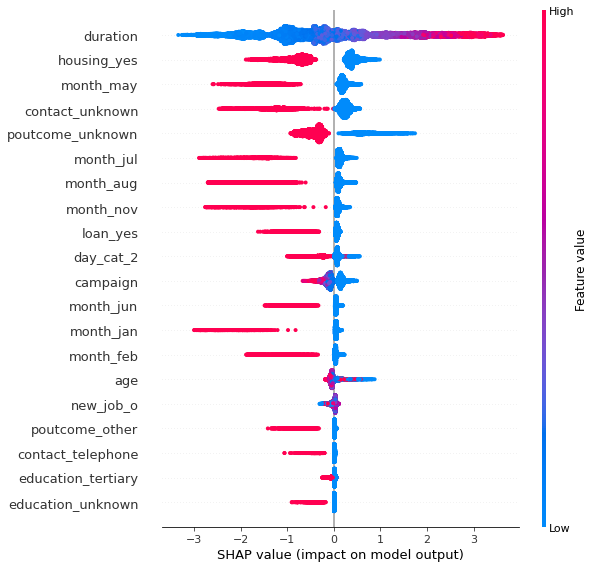

In [ ]:
shap.summary_plot(shap_values[1], x_test, feature_names = X.columns)

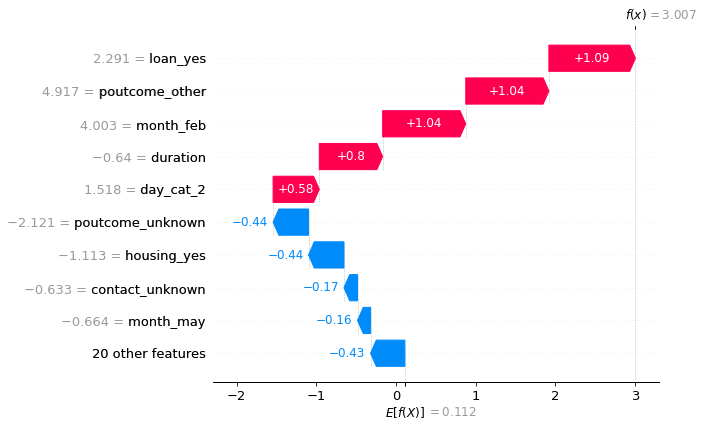

In [ ]:
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], base_values=explainer.expected_value[0], data=x_test[row], feature_names=X.columns.tolist()))

In [ ]:
shap.initjs()
i=8
shap.force_plot(explainer.expected_value[1], shap_values[1][i], x_test[i], feature_names = X.columns)